In [2]:
%matplotlib inline

In [3]:
from praclib import *
from tables import *

In [4]:
tab = read_from_file("204.tab", '\t')

In [5]:
tab

array([[ 1., 50., 20.],
       [ 2., 51., 20.],
       [ 3., 51., 20.],
       [ 1., 46., 80.],
       [ 2., 47., 75.],
       [ 3., 46., 70.],
       [ 1., 46., 63.],
       [ 2., 45., 62.],
       [ 3., 46., 59.],
       [ 1., 45., 50.],
       [ 2., 46., 49.],
       [ 3., 46., 48.],
       [ 1., 45., 42.],
       [ 2., 46., 41.],
       [ 3., 47., 40.],
       [ 1., 49., 33.],
       [ 2., 50., 33.],
       [ 3., 50., 33.]])

In [6]:
b = tab[::, 1::]
print(b)

[[50. 20.]
 [51. 20.]
 [51. 20.]
 [46. 80.]
 [47. 75.]
 [46. 70.]
 [46. 63.]
 [45. 62.]
 [46. 59.]
 [45. 50.]
 [46. 49.]
 [46. 48.]
 [45. 42.]
 [46. 41.]
 [47. 40.]
 [49. 33.]
 [50. 33.]
 [50. 33.]]


In [7]:
first = (b[::, 0] - 21) * 10 ** -3
second = b[::, 1]
print(first, second)

[0.029 0.03  0.03  0.025 0.026 0.025 0.025 0.024 0.025 0.024 0.025 0.025
 0.024 0.025 0.026 0.028 0.029 0.029] [20. 20. 20. 80. 75. 70. 63. 62. 59. 50. 49. 48. 42. 41. 40. 33. 33. 33.]


In [8]:
np.column_stack((first, second))

array([[2.9e-02, 2.0e+01],
       [3.0e-02, 2.0e+01],
       [3.0e-02, 2.0e+01],
       [2.5e-02, 8.0e+01],
       [2.6e-02, 7.5e+01],
       [2.5e-02, 7.0e+01],
       [2.5e-02, 6.3e+01],
       [2.4e-02, 6.2e+01],
       [2.5e-02, 5.9e+01],
       [2.4e-02, 5.0e+01],
       [2.5e-02, 4.9e+01],
       [2.5e-02, 4.8e+01],
       [2.4e-02, 4.2e+01],
       [2.5e-02, 4.1e+01],
       [2.6e-02, 4.0e+01],
       [2.8e-02, 3.3e+01],
       [2.9e-02, 3.3e+01],
       [2.9e-02, 3.3e+01]])

In [10]:
first1 = np.array([np.mean(first[3 * i: 3 * (i + 1):]) for i in range(6)])
second1 = np.array([np.mean(second[3 * i: 3 * (i + 1):]) for i in range(6)])
tab2 = np.column_stack((first1, second1))
print(tab2)

[[2.96666667e-02 2.00000000e+01]
 [2.53333333e-02 7.50000000e+01]
 [2.46666667e-02 6.13333333e+01]
 [2.46666667e-02 4.90000000e+01]
 [2.50000000e-02 4.10000000e+01]
 [2.86666667e-02 3.30000000e+01]]


-0.00026181746893169655 0.0890418021591411
-0.909736680341317 1.5263387603503246e-09


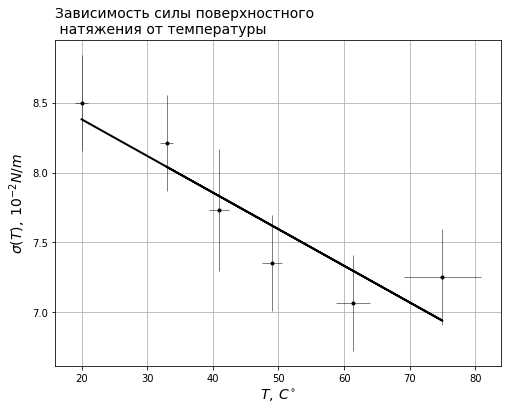

In [ ]:
import matplotlib.pyplot as plt
plt.figure(num=1, figsize=(8, 6))
plt.title('Зависимость силы поверхностного\n натяжения от температуры', size=14, loc='left')
plt.xlabel('$T,\: C^{\circ}$', size=14)
plt.ylabel('$\sigma(T), \: 10^{-2} N/m$', size=14)
# plt.rc('grid', linestyle=":", color='black')
k = 0.911
D = 61 * 10 ** -3
coef = 1 / (2 * k * 3.1415 * D)
xData = tab2[::, 1]
yData = np.array([0.02966667, 0.02533333, 0.02466667, 0.02466667 + 0.001, 0.025 + 0.002, 0.02866667]) * coef
size = 1.0
plt.scatter(xData, 100 * yData, color = "black", marker='o', s=4 * size)

ffit = np.polynomial.polynomial.Polynomial(
    np.polynomial.polynomial.polyfit(xData, yData, 1)
)
yData2 = np.array(list(map(ffit, xData)))
sigmax = sigmax1
sigmay = sigmay1 * coef
sigma = [0.001, 0.001, 0.001, 0.001, 0.001, 0.001] # use for good data as yerr
plt.plot(xData, yData2 * 100, color='black', linestyle='-', marker='', linewidth=2 * size)
print(ffit(1) - ffit(0), ffit(0))
print(get_r(yData, xData), get_sigma_a(xData, sigmay))
plt.errorbar(xData, yData * 100, color='r', yerr=2 * sigmay * 100, xerr=2 * sigmax, fmt='.k', linewidth=size/2)

plt.grid()
plt.savefig('images/plot204_change_norm.png', format='png')
plt.show()

In [15]:
tab2[::, 0]

array([0.02966667, 0.02533333, 0.02466667, 0.02466667, 0.025     ,
       0.02866667])

In [21]:
sigmay1 = np.array([(standard_deviation(first[3 * i: 3 * (i + 1):])[1]**2 + 0.0005**2)**0.5 for i in range(6)])
sigmax1 = np.array([(standard_deviation(second[3 * i: 3 * (i + 1):])[1]**2 + 0.5**2)**0.5 for i in range(6)])

In [ ]:
sigmay1

NameError: name 'sigmay1' is not defined

In [1]:
from praclib import read_from_file

In [17]:
tab = read_from_file("204_ch.tab", "\t")

In [18]:
print(tab)

[[ 1. 50. 20.]
 [ 2. 51. 20.]
 [ 3. 51. 20.]
 [ 1. 46. 76.]
 [ 2. 47. 75.]
 [ 3. 46. 75.]
 [ 1. 48. 63.]
 [ 2. 47. 62.]
 [ 3. 48. 59.]
 [ 1. 47. 50.]
 [ 2. 48. 49.]
 [ 3. 48. 48.]
 [ 1. 47. 42.]
 [ 2. 48. 41.]
 [ 3. 49. 40.]
 [ 1. 49. 33.]
 [ 2. 50. 33.]
 [ 3. 50. 33.]]


In [19]:
from praclib import cut_array
F1, F2, F3, F4, F5, F6 = cut_array(tab[::, 1]- 21, [3, 3, 3, 3, 3, 3])
T1, T2, T3, T4, T5, T6 = cut_array(tab[::, 2], [3, 3, 3, 3, 3, 3])

In [20]:
from value import Value
F1 = Value(name="F1", values=F1, syst=1)
F2 = Value(name="F2", values=F2, syst=1)
F3 = Value(name="F3", values=F3, syst=1)
F4 = Value(name="F4", values=F4, syst=1)
F5 = Value(name="F5", values=F5, syst=1)
F6 = Value(name="F6", values=F6, syst=1)
T1 = Value(name="T1", values=T1, syst=1)
T2 = Value(name="T2", values=T2, syst=1)
T3 = Value(name="T3", values=T3, syst=1)
T4 = Value(name="T4", values=T4, syst=1)
T5 = Value(name="T5", values=T5, syst=1)
T6 = Value(name="T6", values=T6, syst=1)

skj: A = -0.210 +- 0.005 B = 88 +- 11 R = -0.9354349139835821


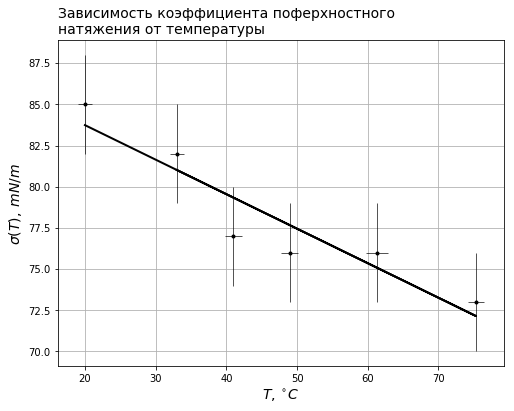

In [48]:
from plotter import Plotter
import numpy as np
k = 0.911
D = 61 * 10 ** -3
coef = 1 / (2 * k * 3.1415 * D)
X = np.array([T1, T2, T3, T4, T5, T6])
Y = np.array([F1, F2, F3, F4, F5, F6]) * Value(current_val=coef)
Plotter(draw_legend=False).set_name("204_1").\
set_title("Зависимость коэффициента поферхностного\nнатяжения от температуры").set_x_name("$T,\\: ^{\\circ}C$").\
set_y_name("$\sigma(T), \\: mN/m$").\
        add_line(Plotter.get_new_line(x_value=X, y_value=Y,
                                      draw_error=True, legend='skj', fit=True, color='black')).\
        plot(show=True, save=True)

In [14]:
print(4/coef)

1.396610372


In [16]:
from tkinter import Tk
from tables import Table
root = Tk()
app = Table(master=root)
app.mainloop()

skj: A = 0.2096 +- 0.0014 B = 57 +- 3 R = 0.99997423843792


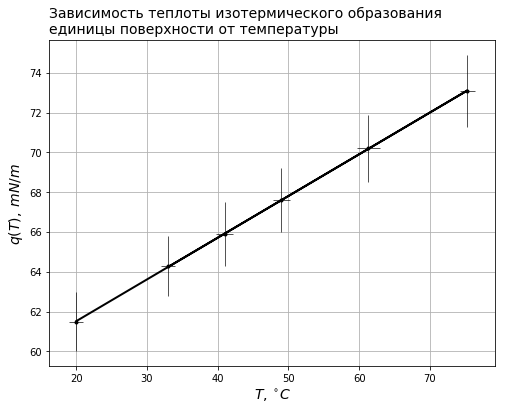

In [49]:
T = X + Value(current_val=273.0)
q = -T * Value(name='sigmat', values=[-0.21, -0.21, -0.21], syst=0.005)
Plotter(draw_legend=False).set_name("204_2").\
set_title("Зависимость теплоты изотермического образования\nединицы поверхности от температуры").set_x_name("$T,\\: ^{\\circ}C$").\
set_y_name("$q(T), \\: mN/m$").\
        add_line(Plotter.get_new_line(x_value=X, y_value=q,
                                      draw_error=True, legend='skj', fit=True, color='black')).\
        plot(show=True, save=True)

skj: A = 0.014 +- 0.005 B = 145 +- 12 R = 0.178715927021851


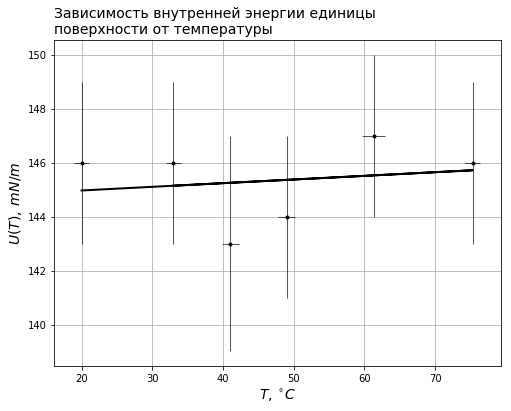

In [50]:
Plotter(draw_legend=False).set_name("204_3").\
set_title("Зависимость внутренней энергии единицы\nповерхности от температуры").set_x_name("$T,\\: ^{\\circ}C$").\
set_y_name("$U(T), \\: mN/m$").\
        add_line(Plotter.get_new_line(x_value=X, y_value=q + Y,
                                      draw_error=True, legend='skj', fit=True, color='black')).\
        plot(show=True, save=True)

In [36]:
m = np.array([5.42, 22.1, 23.02, 14.8]) * 10 ** -3
t = np.array([320, 502, 491, 252])
ce = 412
te = 491
me = 23.02 * 10**-3
c = t/m * me / te * ce
print(c)

[1140.43814491  438.76551502  412.          328.89696703]


In [38]:
c = np.array([1140, 438, 412, 389])
mu = np.array([12, 56, 64, 118])
print(c * mu / 1000)

[13.68  24.528 26.368 45.902]


In [39]:
1511.27-1370.47

140.79999999999995

In [41]:
a = np.array([1351.04, 525.99])
b = np.array([1382.32, 502.91])
c = b - a
print(c[1] / c[0])

-0.7378516624040922


In [42]:
ce * me / (14.8 * 10 ** -3) * (-0.74) * 140.79

-66764.30747999999

In [44]:
66764 * 14.8 * 10 ** -3 / 509

1.9412715127701377

14.8 / 118

In [45]:
14.8/118

0.12542372881355932

In [46]:
1.94 / 0.125

15.52

In [1]:
from praclib import read_from_file
import numpy as np

tab = read_from_file("232_vent.txt", "\t")

In [2]:
tab

array([[1.0000e+00, 0.0000e+00, 4.8589e-01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 5.0000e-02, 4.5742e-01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.0000e+00, 1.0000e-01, 4.4183e-01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.3100e+02, 6.5000e+00, 8.4242e-01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.3200e+02, 6.5500e+00, 8.0582e-01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.3300e+02, 6.6000e+00, 7.5227e-01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [3]:
Umax = max(tab[::, 2])
Umin = min(tab[::, 2])

In [4]:
V = -(tab[::, 2]-Umin)/(Umax - Umin)* 15 + 345
P = tab[::, 3]

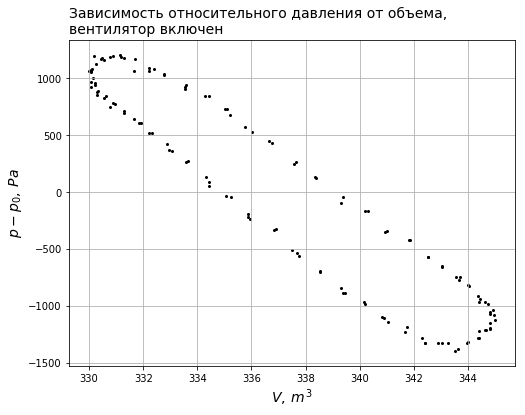

In [11]:
from plotter import Plotter
from value import Value

Pplot = np.array([Value(current_val=a) for a in P])
Vplot = np.array([Value(current_val=a) for a in V])

Plotter(draw_legend=False).set_name("232PV_vent").\
set_title("Зависимость относительного давления от объема,\nвентилятор включен").set_x_name("$V,\\: m^3$").\
set_y_name("$p - p_0, \\: Pa$").\
        add_line(Plotter.get_new_line(x_value=Vplot, y_value=Pplot,
                                      draw_error=False, legend='skj', fit=False, color='black')).\
        plot(show=True, save=True)

In [6]:
from scipy.optimize import curve_fit

In [7]:
T = tab[::, 1]

In [16]:
from math import sin
def funcP(t, p_0, p_1, omega, phi):
    return p_0 + p_1 * np.sin(omega * t + phi)

popt, pcov = curve_fit(funcP, P[:20:], T[:20:])
er = np.sqrt(np.diag(pcov))
print("с вентилятором p0 = {} +- {}".format(popt[0], er[0]))
print("с вентилятором p1 = {} +- {}".format(popt[1], er[1]))
print("с вентилятором omega = {} +- {}".format(popt[2], er[2]))
print("с вентилятором phi1 = {} +- {}".format(popt[3], er[3]))

с вентилятором p0 = 0.44449732760224414 +- 0.06105937690051112
с вентилятором p1 = 0.30572778795826966 +- 0.10527471711213611
с вентилятором omega = 1.000007211973598 +- 0.00028377580917262967
с вентилятором phi1 = 2.339864889969389 +- 0.26067198415576676


In [9]:
from math import pi
print("период", 2 * pi)

период 6.283185307179586


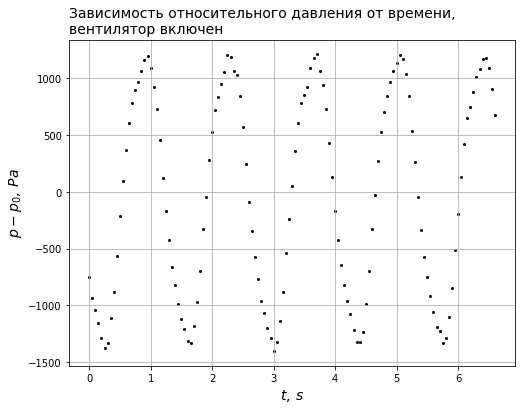

In [18]:
%matplotlib inline
Tplot = np.array([Value(current_val=a) for a in T])
Plotter(draw_legend=False).set_name("232PT_vent").\
set_title("Зависимость относительного давления от времени,\nвентилятор включен").set_x_name("$t,\\: s$").\
set_y_name("$p - p_0, \\: Pa$").\
        add_line(Plotter.get_new_line(x_value=Tplot, y_value=Pplot,
                                      draw_error=False, legend='skj', fit=False, color='black')).\
        plot(show=True, save=True)

In [12]:
T

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
       2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25,
       3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 ,
       3.85, 3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35,
       4.4 , 4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 ,
       4.95, 5.  , 5.05, 5.1 , 5.15, 5.2 , 5.25, 5.3 , 5.35, 5.4 , 5.45,
       5.5 , 5.55, 5.6 , 5.65, 5.7 , 5.75, 5.8 , 5.85, 5.9 , 5.95, 6.  ,
       6.05, 6.1 , 6.15, 6.2 , 6.25, 6.3 , 6.35, 6.4 , 6.45, 6.5 , 6.55,
       6.6 ])

In [13]:
P

array([ -746.73 ,  -939.1  , -1039.1  , -1154.6  , -1285.4  , -1377.7  ,
       -1331.5  , -1108.4  ,  -885.24 ,  -562.05 ,  -215.78 ,    92.023,
         369.04 ,   607.59 ,   776.88 ,   892.3  ,   969.25 ,  1061.6  ,
        1161.6  ,  1192.4  ,  1092.4  ,   923.08 ,   730.71 ,   453.69 ,
         122.8  ,  -169.61 ,  -423.54 ,  -662.08 ,  -815.98 ,  -985.27 ,
       -1123.8  , -1208.4  , -1316.2  , -1331.5  , -1185.3  ,  -969.88 ,
        -692.86 ,  -323.51 ,   -46.487,   276.7  ,   522.94 ,   715.32 ,
         830.74 ,   946.17 ,  1053.9  ,  1200.1  ,  1184.7  ,  1061.6  ,
        1030.8  ,   846.13 ,   569.11 ,   245.92 ,   -92.656,  -346.59 ,
        -569.74 ,  -769.81 ,  -962.19 , -1069.9  , -1200.7  , -1285.4  ,
       -1400.8  , -1323.9  , -1139.2  ,  -885.24 ,  -538.96 ,  -238.86 ,
          53.548,   361.35 ,   607.59 ,   784.57 ,   853.83 ,   923.08 ,
        1084.7  ,  1177.   ,  1207.8  ,  1061.6  ,   938.47 ,   730.71 ,
         430.6  ,   130.5  ,  -169.61 ,  -423.54 , 

In [14]:
for t in Tplot:
    print(t.get_value_error())

(Decimal('0'), Decimal('0'))
(Decimal('0.05000000000000000277555756156289135105907917022705078125'), Decimal('0'))
(Decimal('0.1000000000000000055511151231257827021181583404541015625'), Decimal('0'))
(Decimal('0.1499999999999999944488848768742172978818416595458984375'), Decimal('0'))
(Decimal('0.200000000000000011102230246251565404236316680908203125'), Decimal('0'))
(Decimal('0.25'), Decimal('0'))
(Decimal('0.299999999999999988897769753748434595763683319091796875'), Decimal('0'))
(Decimal('0.34999999999999997779553950749686919152736663818359375'), Decimal('0'))
(Decimal('0.40000000000000002220446049250313080847263336181640625'), Decimal('0'))
(Decimal('0.450000000000000011102230246251565404236316680908203125'), Decimal('0'))
(Decimal('0.5'), Decimal('0'))
(Decimal('0.5500000000000000444089209850062616169452667236328125'), Decimal('0'))
(Decimal('0.59999999999999997779553950749686919152736663818359375'), Decimal('0'))
(Decimal('0.65000000000000002220446049250313080847263336181640625'), 

In [15]:
from math import sin
def funcP(t, v0, v1, omega, phi):
    return v0 + v1 * np.sin(omega * t + phi)

popt, pcov = curve_fit(funcP, V[:100:], T[:100:])
er = np.sqrt(np.diag(pcov))
print("с вентилятором v0 = {} +- {}".format(popt[0], er[0]))
print("с вентилятором v1 = {} +- {}".format(popt[1], er[1]))
print("с вентилятором omega = {} +- {}".format(popt[2], er[2]))
print("с вентилятором phi2 = {} +- {}".format(popt[3], er[3]))

с вентилятором v0 = 2.4754231000405453 +- 0.1483686406181661
с вентилятором v1 = 0.15962447235451085 +- 0.19135856048808217
с вентилятором omega = 1.1221985042265306 +- 0.3078947191770042
с вентилятором phi2 = -36.18250694256112 +- 103.9565151087787


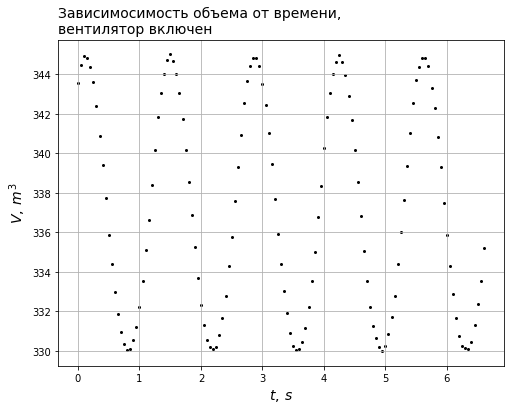

In [20]:
Plotter(draw_legend=False).set_name("232VT_vent").\
set_title("Зависимосимость объема от времени,\nвентилятор включен").set_x_name("$t,\\: s$").\
set_y_name("$V, \\: m^3$").\
        add_line(Plotter.get_new_line(x_value=Tplot, y_value=Vplot,
                                      draw_error=False, legend='skj', fit=False, color='black')).\
        plot(show=True, save=True)

In [21]:
from praclib import read_from_file
import numpy as np

tab = read_from_file("232_bez.txt", "\t")

In [22]:
Umax = max(tab[::, 2])
Umin = min(tab[::, 2])

In [23]:
V = -(tab[::, 2]-Umin)/(Umax - Umin)* 15 + 345
P = tab[::, 3]

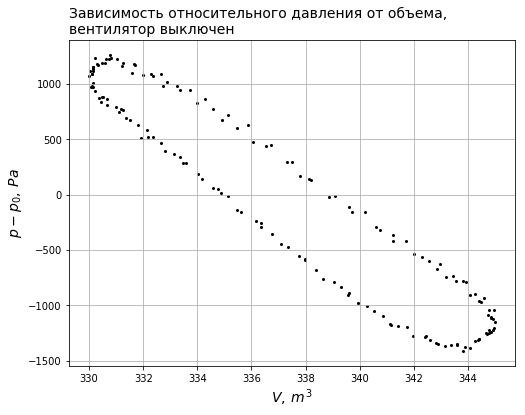

In [24]:
from plotter import Plotter
from value import Value

Pplot = np.array([Value(current_val=a) for a in P])
Vplot = np.array([Value(current_val=a) for a in V])

Plotter(draw_legend=False).set_name("232PV_bez").\
set_title("Зависимость относительного давления от объема,\nвентилятор выключен").set_x_name("$V,\\: m^3$").\
set_y_name("$p - p_0, \\: Pa$").\
        add_line(Plotter.get_new_line(x_value=Vplot, y_value=Pplot,
                                      draw_error=False, legend='skj', fit=False, color='black')).\
        plot(show=True, save=True)

In [25]:
T = tab[::, 1]

In [29]:
from math import sin
def funcP(t, p_0, p_1, omega, phi):
    return p_0 + p_1 * np.sin(omega * t + phi)

popt, pcov = curve_fit(funcP, P[:20:], T[:20:])
er = np.sqrt(np.diag(pcov))
print("без вентилятора p0 = {} +- {}".format(popt[0], er[0]))
print("без вентилятора p1 = {} +- {}".format(popt[1], er[1]))
print("без вентилятора omega = {} +- {}".format(popt[2], er[2]))
print("без вентилятора phi1 = {} +- {}".format(popt[3], er[3]))

без вентилятора p0 = 0.5715104104983594 +- 0.05721952315210867
без вентилятора p1 = 0.37176094759642203 +- 0.09683885007053045
без вентилятора omega = 1.000325050702838 +- 0.0001878371073398267
без вентилятора phi1 = 1.713118339555633 +- 0.18528997326058233


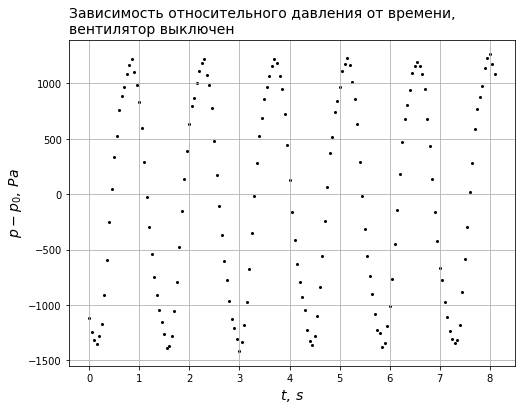

In [27]:
%matplotlib inline
Tplot = np.array([Value(current_val=a) for a in T])
Plotter(draw_legend=False).set_name("232PT_bez").\
set_title("Зависимость относительного давления от времени,\nвентилятор выключен").set_x_name("$t,\\: s$").\
set_y_name("$p - p_0, \\: Pa$").\
        add_line(Plotter.get_new_line(x_value=Tplot, y_value=Pplot,
                                      draw_error=False, legend='skj', fit=False, color='black')).\
        plot(show=True, save=True)

In [30]:
from math import sin
def funcP(t, v0, v1, omega, phi):
    return v0 + v1 * np.sin(omega * t + phi)

popt, pcov = curve_fit(funcP, V[:100:], T[:100:])
er = np.sqrt(np.diag(pcov))
print("без вентилятора v0 = {} +- {}".format(popt[0], er[0]))
print("без вентилятора v1 = {} +- {}".format(popt[1], er[1]))
print("без вентилятора omega = {} +- {}".format(popt[2], er[2]))
print("без вентилятора phi2 = {} +- {}".format(popt[3], er[3]))

без вентилятора v0 = 2.482919025894683 +- 0.16484773509357895
без вентилятора v1 = -0.09248782961930972 +- 0.2117570175436088
без вентилятора omega = 1.2167494813091264 +- 0.49384895213380436
без вентилятора phi2 = -72.53451580705826 +- 166.21217086536004


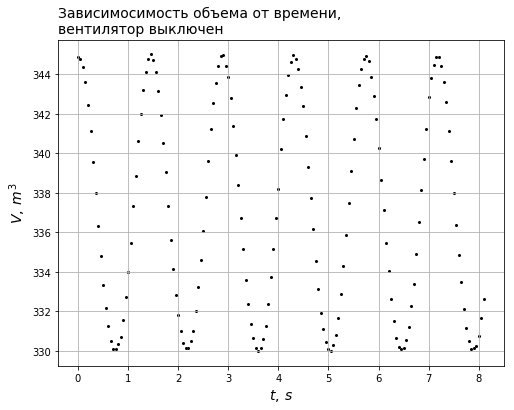

In [31]:
Plotter(draw_legend=False).set_name("232VT_bez").\
set_title("Зависимосимость объема от времени,\nвентилятор выключен").set_x_name("$t,\\: s$").\
set_y_name("$V, \\: m^3$").\
        add_line(Plotter.get_new_line(x_value=Tplot, y_value=Vplot,
                                      draw_error=False, legend='skj', fit=False, color='black')).\
        plot(show=True, save=True)

In [34]:
p1 = Value(name="p_1", values=[1241]*3, syst=12)
v1 = Value(name="V_1", values=[7.49]*3, syst=0.03)
omega = Value(name="omega", values=[4.575]*3, syst=0.007)
dphi = Value(name="delta", values=[3.526]*3, syst=0.024)

from sympy import sin
pp = p1 * v1 * omega * dphi.use_func(sin) / Value(current_val=2)
print(pp.get_value_error())

(Decimal('-8.0E+3'), Decimal('5E+2'))


это была мощность и погрешность, мощность положительна